<a href="https://colab.research.google.com/github/jkmolina30/Challenge_Telecom_X/blob/main/TelecomX_LATAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracción

In [62]:
import pandas as pd
url= 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
dfdatos= pd.read_json(url)

**Muestra del Dataframe Original**

In [63]:
dfdatos.sample(10)

,customerID,Churn,customer,phone,internet,account
7216,9926-PJHDQ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
5446,7459-RRWQZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3369,4680-KUTAJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2333,3253-HKOKL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
6872,9483-GCPWE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
3037,4226-KKDON,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2585,3604-WLABM,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3304,4609-KNNWG,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7117,9798-DRYDS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
5884,8043-PNYSD,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [64]:
dfdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [65]:
dfdatos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


# 🔧 **Transformación**


Vamos a realizar la normalizacion o expansion de las columnas del JSON

In [66]:
# Copiamos el dataframe original a otro dataframe llamado dfExp
dfExp = dfdatos.copy()

In [67]:
#Extraemos las columnas anidadas y las normalizamos por separado.
customerExp = pd.json_normalize(dfExp['customer'])
phoneExp = pd.json_normalize(dfExp['phone'])
internetExp = pd.json_normalize(dfExp['internet'])
accountExp = pd.json_normalize(dfExp['account'])

#Luego construimos un nuevo DataFrame dfFinal combinando:
dfFinal = pd.concat([dfExp['customerID'], dfExp['Churn'], customerExp, phoneExp, internetExp, accountExp], axis=1)

dfFinal.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4934,6734-GMPVK,No,Male,0,No,No,5,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.30,550.6
3948,5392-AKEMH,No,Female,0,No,No,12,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.05,523.1
3194,4459-BBGHE,No,Male,0,No,Yes,30,No,No phone service,DSL,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.50,1307.8
463,0661-KBKPA,No,Male,0,Yes,Yes,53,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,78.75,3942.45
4774,6543-CPZMK,Yes,Male,0,Yes,Yes,9,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.95,248.95
5643,7707-PYBBH,No,Male,0,No,No,40,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,61.90,2647.1
1011,1422-DGUBX,No,Male,0,Yes,No,32,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,One year,Yes,Electronic check,79.25,2619.15
3337,4641-FROLU,No,Female,0,Yes,Yes,30,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.30,602.9
6781,9359-UGBTK,No,Female,0,No,No,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.35,4991.5
5091,6961-MJKBO,No,Male,0,No,No,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.45,943


In [68]:
#Mostramos las columnas del nuevo dataframe dfFinal
dfFinal.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [69]:
#Mostramos una visión general del DataFrame, incluyendo:
# 1. Número total de filas y columnas.
# 2. Nombre de cada columna.
# 3. Cantidad de valores no nulos por columna.
# 4. Tipo de datos (dtype) de cada columna.
# 5. Uso de memoria.
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [70]:
#Varificamos que tipos de datos del dataframe "dfFinal" tiene para cada columna
dfFinal.dtypes

#Vamos que al imprimir el tipo de datos de la columna "Charges.Total" es de tipo: object
#Este datos deberia ser float, ya que los valores que se almacenaran son numeros decimales


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [71]:
#Convertimos la columna "Charges.Total" con el tipo de dato correcto "float64"
dfFinal['Charges.Total'] = pd.to_numeric(dfFinal['Charges.Total'], errors='coerce')
print(dfFinal.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [72]:
#Evaluamos valores nulos " "
print(dfFinal.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [73]:
#Evaluamos valores nulos " "
dfFinal.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [74]:
#Vemos los registros con NaN en esa columna:
dfFinal[dfFinal['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [75]:
#Copio el dfFinal a dfFinal2
dfFinal2 = dfFinal.copy()

#Una vez copiado en el nuevo dataframe, relleno los valos vacios "NaN" con 0
dfFinal2['Charges.Total'] = dfFinal2['Charges.Total'].fillna(0)

In [76]:
#Verificamos que No halla registros vacios en la columna "Charges.Total" ya esten en Cero (0)
dfFinal2.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [77]:
#Mostramos que los registros ya esten en cero (0)
dfFinal2[dfFinal['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [78]:
#Evaluamos valores duplicados
duplicados = dfFinal2.duplicated()
print("Filas duplicadas:", duplicados.sum())
print(dfFinal2[dfFinal2.duplicated()])

Filas duplicadas: 0
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [79]:
#Mostramos las columnas de nuevo dataframe dfFinal2
dfFinal2.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [80]:
#Contamos cuántos valores duplicados hay en cada columna del DataFrame, dfFinal2.
for i in dfFinal2.columns:
    num_dup = dfFinal2[i].duplicated().sum()
    print(f"{i}: {num_dup} duplicados")

customerID: 0 duplicados
Churn: 7264 duplicados
gender: 7265 duplicados
SeniorCitizen: 7265 duplicados
Partner: 7265 duplicados
Dependents: 7265 duplicados
tenure: 7194 duplicados
PhoneService: 7265 duplicados
MultipleLines: 7264 duplicados
InternetService: 7264 duplicados
OnlineSecurity: 7264 duplicados
OnlineBackup: 7264 duplicados
DeviceProtection: 7264 duplicados
TechSupport: 7264 duplicados
StreamingTV: 7264 duplicados
StreamingMovies: 7264 duplicados
Contract: 7264 duplicados
PaperlessBilling: 7265 duplicados
PaymentMethod: 7263 duplicados
Charges.Monthly: 5682 duplicados
Charges.Total: 736 duplicados


In [81]:
#Varificamos cuantos registros de la columna "Churn" estan en Yes, No y vacios (" ") y muestra que vacios "" hay 224
print(dfFinal2['Churn'].unique())
print(dfFinal2['Churn'].value_counts(dropna=False))

['No' 'Yes' '']
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [82]:
#Creamos un nuevo DataFrame df_vacios_churn que filtra solo las filas donde la columna Churn esta vacía ('').
df_vacios_churn = dfFinal2[dfFinal2['Churn'] == '']
print(df_vacios_churn)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30    

In [83]:
#Filtramos las mismas filas vacias, pero solo imprime la columna customerID de esas filas vacías.
#Sirve para ver qué clientes tienen el campo Churn vacío.
print(dfFinal2[dfFinal2['Churn'] == '']['customerID'])

30      0047-ZHDTW
75      0120-YZLQA
96      0154-QYHJU
98      0162-RZGMZ
175     0274-VVQOQ
           ...    
7158    9840-GSRFX
7180    9872-RZQQB
7211    9920-GNDMB
7239    9955-RVWSC
7247    9966-VYRTZ
Name: customerID, Length: 224, dtype: object


In [84]:
# Borramos los campos vacíos de la columna Churn

#importamos la libreria numpy
import numpy as np

# Reemplazar '' y 'NaN' por np.nan (NaN real)
dfFinal2['Churn'] = dfFinal2['Churn'].replace(['', 'NaN', 'nan', 'None'], np.nan)

#Eliminamos todas las filas donde Churn ahora es NaN.
#Quedamos solo con las filas donde Churn tiene un valor válido.
dfFinal2 = dfFinal2.dropna(subset=['Churn'])

In [85]:
#Varificamos que no haya valores vacios en la columna Churn, que todos se hayan eliminado
print(dfFinal2['Churn'].unique())
print(dfFinal2['Churn'].value_counts(dropna=False))

['No' 'Yes']
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [86]:
#Mostramos cuántos valores nulos y no nulos hay en cada columna.
resumen = pd.DataFrame({
    'No nulos': dfFinal2.notna().sum(),
    'Nulos': dfFinal2.isna().sum(),
    'Total': len(dfFinal2)
})
print(resumen)

                  No nulos  Nulos  Total
customerID            7043      0   7043
Churn                 7043      0   7043
gender                7043      0   7043
SeniorCitizen         7043      0   7043
Partner               7043      0   7043
Dependents            7043      0   7043
tenure                7043      0   7043
PhoneService          7043      0   7043
MultipleLines         7043      0   7043
InternetService       7043      0   7043
OnlineSecurity        7043      0   7043
OnlineBackup          7043      0   7043
DeviceProtection      7043      0   7043
TechSupport           7043      0   7043
StreamingTV           7043      0   7043
StreamingMovies       7043      0   7043
Contract              7043      0   7043
PaperlessBilling      7043      0   7043
PaymentMethod         7043      0   7043
Charges.Monthly       7043      0   7043
Charges.Total         7043      0   7043


In [87]:
#Ahora Limpiamos los espacios que hayan en las columnas del dataframa
dfFinal2.columns = dfFinal2.columns.str.strip()

In [90]:
#Ahora crearemos una nueva columna al dataframe dfFinal2 llamada DailyCount,
#la cual nos servira para conocer el valor del precio diario del cargo del mes

dfFinal2['DailyCount'] = dfFinal2['Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
print(dfFinal2[['Charges.Monthly', 'DailyCount']].sample(10))

      Charges.Monthly  DailyCount
476             71.90    2.396667
6881            95.30    3.176667
3506            24.10    0.803333
238             64.35    2.145000
699             48.80    1.626667
6696           104.85    3.495000
3725           114.50    3.816667
5696            65.20    2.173333
2209            25.55    0.851667
5190            25.40    0.846667


#📊 Carga y análisis

Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [92]:
dfFinal2.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,DailyCount
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


Distribución de evasión.

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.
Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.


In [129]:
#Clientes que abandonaron y permanecieron

import plotly.express as px

#Contamos la cantidad de valores que hay de cada categoría en la columna Churn (Yes / No).
#Creamos un nuevo DataFrame con dos columnas:
    #Churn: la categoría (Yes o No)
    #Count: cantidad de clientes en cada categoría
churn_counts = dfFinal2['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']


#Crea un gráfico de pastel con:
#Tamaño de cada porción según Count.
#Etiquetas con Churn (Yes o No).
#Colores personalizados:
#'No': verde
#'Yes': rojo
fig = px.pie(
    churn_counts,
    values='Count',
    names='Churn',
    title='Proporción de Clientes según se dieron de baja',
    color='Churn',
    color_discrete_map={'No': 'green', 'Yes': 'red'}
)

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [97]:
import plotly.express as px

#Grafico de barras
fig = px.bar(
    churn_counts,
    x='Churn',         # Eje X: categorías 'Yes' y 'No'
    y='Count',         # Eje Y: cantidad de clientes
    title='Número de Clientes según se dieron de baja',
    color='Churn',     # Para colorear las barras
    color_discrete_map={'No': 'green', 'Yes': 'red'},
    text='Count'       # Muestra el número arriba de cada barra
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Número de Clientes', xaxis_title='Churn')
fig.show()


Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [98]:
#Evacion por Genero
import plotly.express as px

fig = px.histogram(dfFinal2, x='gender', color='Churn', barmode='group',
                   title='Distribución de evasión según Género',
                   labels={'gender': 'Género', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()


In [99]:
#evasión por tipo de contrato
fig = px.histogram(dfFinal2, x='Contract', color='Churn', barmode='group',
                   title='Distribución de evasión según Tipo de Contrato',
                   labels={'Contract': 'Tipo de Contrato', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [101]:
#evasión por método de pago
fig = px.histogram(dfFinal2, x='PaymentMethod', color='Churn', barmode='group',
                   title='Distribución de evasión según Método de Pago',
                   labels={'PaymentMethod': 'Método de Pago', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [104]:
#Porcentaje de clientes que hicieron evasión según el tipo de contrato
import pandas as pd
import plotly.express as px

# Agrupar y calcular porcentaje de churn dentro de cada categoría de contrato
df_group = dfFinal2.groupby(['Contract', 'Churn']).size().reset_index(name='count')
df_total = df_group.groupby('Contract')['count'].transform('sum')
df_group['percentage'] = round(df_group['count'] / df_total * 100, 2)

# Filtrar solo los clientes que se dieron de baja
df_churn_yes = df_group[df_group['Churn'] == 'Yes']

# Gráfico de torta
fig = px.pie(
    df_churn_yes,
    values='percentage',
    names='Contract',
    title='% de Clientes que hicieron evasión según Tipo de Contrato',
    color='Contract',
    labels={'Contract': 'Tipo de Contrato', 'percentage': 'Porcentaje (%)'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [106]:
import pandas as pd
import plotly.express as px

categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for var in categorical_vars:
    # Agrupar y calcular proporción dentro de cada categoría
    df_group = dfFinal2.groupby([var, 'Churn']).size().reset_index(name='count')
    df_total = df_group.groupby(var)['count'].transform('sum')
    df_group['percentage'] = round(df_group['count'] / df_total * 100, 2)

    # Filtrar solo los clientes que se dieron de baja
    df_churn_yes = df_group[df_group['Churn'] == 'Yes']

    # Gráfico de pastel
    fig = px.pie(
        df_churn_yes,
        values='percentage',
        names=var,
        title=f'% de Clientes que hicieron evasión según {var}',
        color=var,
        labels={var: var, 'percentage': 'Porcentaje (%)'}
    )

    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [109]:
import pandas as pd
import plotly.express as px

import pandas as pd
import plotly.express as px

# Limpiar y preparar los datos
df_clean = dfFinal2.dropna(subset=['Charges.Total'])
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')
df_clean = df_clean.dropna(subset=['Charges.Total'])  # Por si hubo errores al convertir

# Crear bins y calcular el punto medio
df_clean['Charges_bin'] = pd.cut(df_clean['Charges.Total'], bins=50)
df_group = df_clean.groupby(['Charges_bin', 'Churn']).size().reset_index(name='count')
df_group['Charges_mid'] = df_group['Charges_bin'].apply(lambda x: x.mid)

# Crear gráfico de área (relleno debajo de la línea)
fig = px.area(
    df_group,
    x='Charges_mid',
    y='count',
    color='Churn',
    title='Distribución de Total Gastado según Estado de evasión (Área Rellena)',
    labels={'Charges_mid': 'Total Gastado', 'count': 'Número de Clientes'},
    color_discrete_map={'No': 'green', 'Yes': 'red'}
)

fig.update_layout(xaxis_title='Total Gastado', yaxis_title='Número de Clientes')
fig.show()



In [111]:
#Comparación de Meses de Contraro según evasión
#Qué nos muestra el gráfico?
#Mediana (línea dentro de la caja): tiempo típico en meses que estuvieron los clientes.
#Rango intercuartil (IQR): muestra la dispersión central del 50% de los datos.
#Bigotes (whiskers): marcan el rango de los datos más comunes.
#Puntos fuera de la caja: son outliers (valores atípicos).

fig = px.box(dfFinal2, x='Churn', y='tenure', color='Churn',
             title='Tiempo de Contrato (Tenure) según Estado de evasión',
             labels={'tenure': 'Meses de Contrato'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [114]:
#Compara las distribuciones de clientes que se dieron de baja (Churn = Yes) vs los que no (Churn = No).
fig = px.histogram(dfFinal2, x='tenure', color='Churn',
                   nbins=50,
                   title='Distribución del Tiempo de Contrato según evasión',
                   labels={'tenure': 'Meses de Contrato'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [116]:
#Comparación de Charges.Monthly por evasión


fig = px.box(dfFinal2, x='Churn', y='Charges.Monthly', color='Churn',
             title='Cargo Mensual según Estado de evasión',
             labels={'Charges.Monthly': 'Monto Mensual'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [118]:
#Cuentas Diarias por evasión


fig = px.box(dfFinal2, x='Churn', y='DailyCount', color='Churn',
             title='Distribución de Cuentas Diarias según Estado de evasión',
             labels={'DailyCount': 'Valor Diario de Facturación'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [121]:
fig = px.histogram(dfFinal2, x='DailyCount', color='Churn',
                   nbins=50,
                   title='Distribución de Cuentas Diarias según Estado de evasión',
                   labels={'DailyCount': 'Facturación Diaria Estimada'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

**Análisis de correlación**

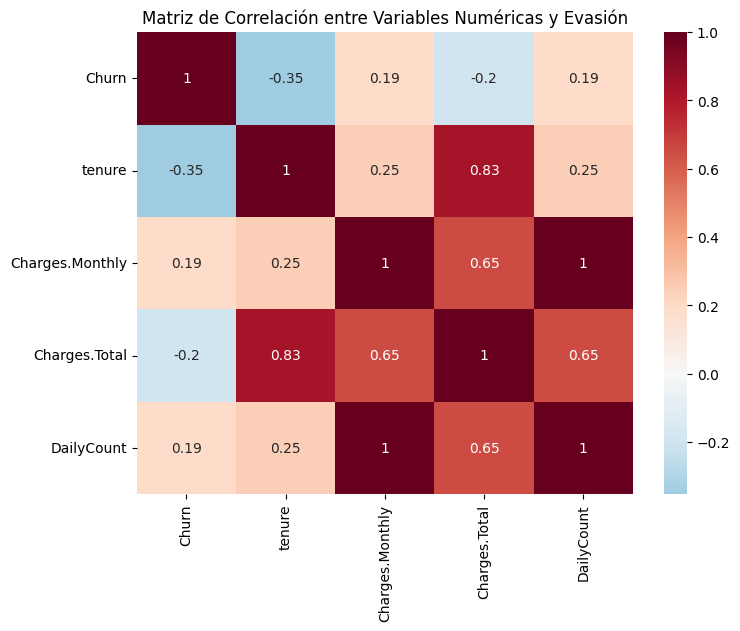

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos 'Churn' a numérico: Yes = 1, No = 0
df_correlacion = dfFinal2.copy()
df_correlacion['Churn'] = df_correlacion['Churn'].map({'Yes': 1, 'No': 0})

# Selección de variables numéricas para correlación
numeric_vars = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'DailyCount']

# Matriz de correlación
# corr_matrix = df_correlacion[numeric_vars].corr()
corr_matrix = df_correlacion[numeric_vars].corr()

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas y Evasión')
plt.show()

In [127]:
#Relación entre Cuentas Diarias y Evasión (Scatter Plot)
fig = px.scatter(df_correlacion,
                 x='DailyCount',
                 y='Churn',
                 color='Churn',
                 color_continuous_scale=['green', 'red'],
                 labels={'DailyCount': 'Gasto Diario Estimado', 'Churn': 'Evasión'},
                 title='Relación entre Gasto Diario y Evasión')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.show()

In [128]:
#Número de servicios contratados vs Evasión
# Columnas que representan servicios
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertimos respuestas tipo "Yes" a 1, "No"/"No internet service"/"No phone service" a 0
df_servicios = dfFinal2.copy()
for col in servicios:
    df_servicios[col] = df_servicios[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Creamos columna nueva: total de servicios contratados
df_servicios['Cantidad_Servicios'] = df_servicios[servicios].sum(axis=1)

# Agregamos columna Churn numérica
df_servicios['Churn'] = df_servicios['Churn'].map({'Yes': 1, 'No': 0})

fig = px.scatter(df_servicios,
                 x='Cantidad_Servicios',
                 y='Churn',
                 color='Churn',
                 labels={'Cantidad_Servicios': 'Número de Servicios Contratados', 'Churn': 'Evasión'},
                 title='Relación entre Cantidad de Servicios y Evasión')
fig.update_traces(marker=dict(size=6), selector=dict(mode='markers'))
fig.show()

#**📄Informe final**

🔍 Introducción
En un mercado de telecomunicaciones cada vez más competitivo, la retención de clientes se ha vuelto tan crítica como la adquisición de nuevos. Telecom X enfrenta actualmente un problema significativo de evasión de clientes (churn), lo que repercute directamente en sus ingresos y sostenibilidad.

El propósito de este análisis es entender los factores que influyen en la cancelación del servicio por parte de los usuarios. Para ello, se trabajó con una base de datos que incluye información demográfica, contractual y de consumo de los clientes. A partir de este análisis se busca:

Identificar patrones asociados al comportamiento de quienes abandonan el servicio.

Detectar segmentos con mayor probabilidad de churn.

Generar insights estratégicos que orienten futuras acciones de retención y fidelización.

Este trabajo representa la fase inicial del proyecto “Churn de Clientes” y servirá como base para desarrollar modelos predictivos y políticas más efectivas de gestión del cliente.

🧹 Limpieza y Preparación de los Datos
Para garantizar un análisis preciso y confiable, se realizó un proceso de preparación de datos que abarcó las siguientes etapas:

1. Carga de datos
Se importó la base original en un DataFrame de pandas. Esta contiene variables demográficas, servicios contratados, características contractuales y montos de facturación de clientes que han utilizado los servicios de Telecom X.

2. Exploración preliminar
Se inspeccionó la estructura del DataFrame para revisar:

El formato y tipo de datos.

La existencia de valores faltantes o inconsistencias.

3. Verificación de valores nulos
No se identificaron valores nulos significativos, por lo que no fue necesario aplicar técnicas de imputación ni eliminar registros.

4. Revisión y conversión de tipos
Se validó que variables clave como Charges.Total y tenure tuvieran el tipo de dato numérico correcto. En caso contrario, se hubieran convertido usando pd.to_numeric() (aunque no fue necesario en este caso).

5. Creación de variables derivadas
Se generó la columna Cuentas_Diarias, que estima el gasto diario promedio del cliente, calculado como:

python
Copiar
Editar
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
Esta nueva variable permite un análisis más detallado del comportamiento de facturación.

📊 Análisis Exploratorio de Datos
📌 Descripción general
La base de datos contiene información de 7,043 clientes, donde cada fila representa un cliente y cada columna una característica relevante: demográfica, contractual, de uso del servicio o de facturación.

🔹 Variables Demográficas
gender: Género del cliente.

SeniorCitizen: Indica si tiene más de 65 años.

Partner y Dependents: Situación familiar y dependientes a cargo.

🔹 Variables Contractuales y de Servicio
tenure: Tiempo como cliente (en meses).

Contract: Tipo de contrato (mensual, 1 año, 2 años).

PaperlessBilling, PaymentMethod: Modalidades de facturación y pago.

PhoneService, InternetService y servicios adicionales como OnlineSecurity, StreamingTV, etc.

🔹 Variables de Facturación
Charges.Monthly: Costo mensual del cliente.

Charges.Total: Monto total pagado hasta el momento.

Cuentas_Diarias: Gasto estimado por día.

🔹 Variable Objetivo
Churn: Indica si el cliente canceló (Yes) o sigue activo (No).

Esta combinación de variables permite un análisis completo del perfil de los clientes y facilita la identificación de los factores asociados a la evasión.

📈 Principales Hallazgos del EDA
✅ 1. Distribución de Evasión
Se exploró visualmente la proporción de clientes que cancelaron el servicio.
Resultado:

Aproximadamente un 26% de los clientes abandonaron el servicio.

El 74% restante continúa activo.

Esta tasa de evasión es elevada, lo que refuerza la importancia del análisis y la necesidad de implementar medidas para reducirla.

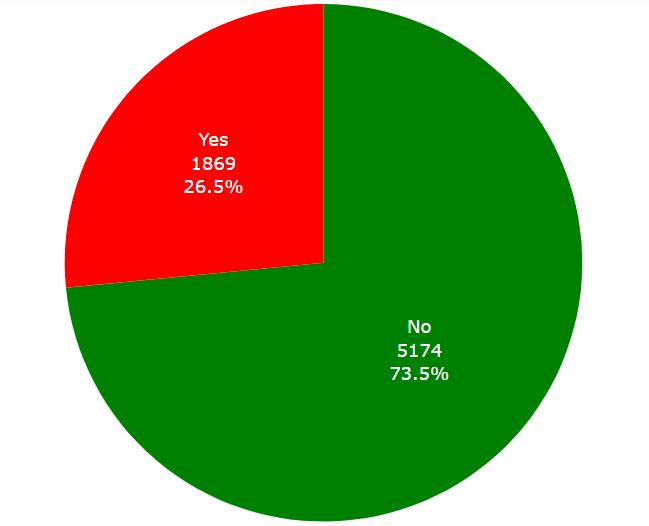




📌 2. Churn y Variables Categóricas
Se analizaron distintas variables categóricas —como gender, Contract, PaymentMethod e InternetService— para entender cómo se relacionan con el estado de cancelación del servicio (Churn).

🔍 Hallazgos principales:
📄 Tipo de Contrato (Contract):
Los clientes con contratos mensuales presentan una tasa de cancelación significativamente más alta. En contraste, aquellos con contratos anuales o bianuales tienden a permanecer más tiempo con la empresa.

💳 Método de Pago (PaymentMethod):
Los usuarios que pagan mediante cheque electrónico (Electronic check) muestran una mayor propensión a cancelar que aquellos que utilizan otros métodos como tarjeta de crédito o débito automático.

🌐 Tipo de Internet (InternetService):
Los clientes con servicio de fibra óptica (Fiber optic) tienen una tasa de churn más elevada en comparación con quienes usan DSL o no tienen servicio de internet.

🔐 Servicios Adicionales (OnlineSecurity, TechSupport):
La ausencia de servicios complementarios, como seguridad en línea o soporte técnico, se asocia con un mayor abandono. Esto sugiere que estos servicios pueden influir en la permanencia del cliente.

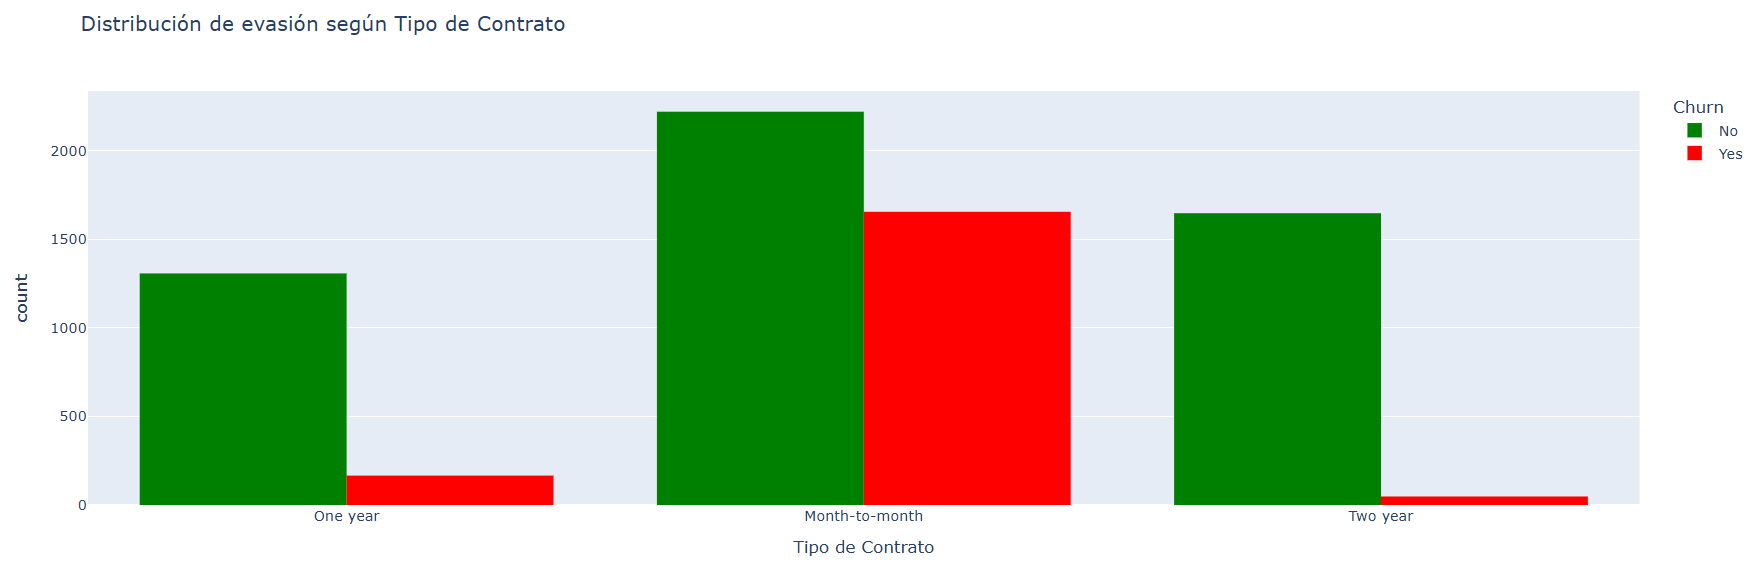

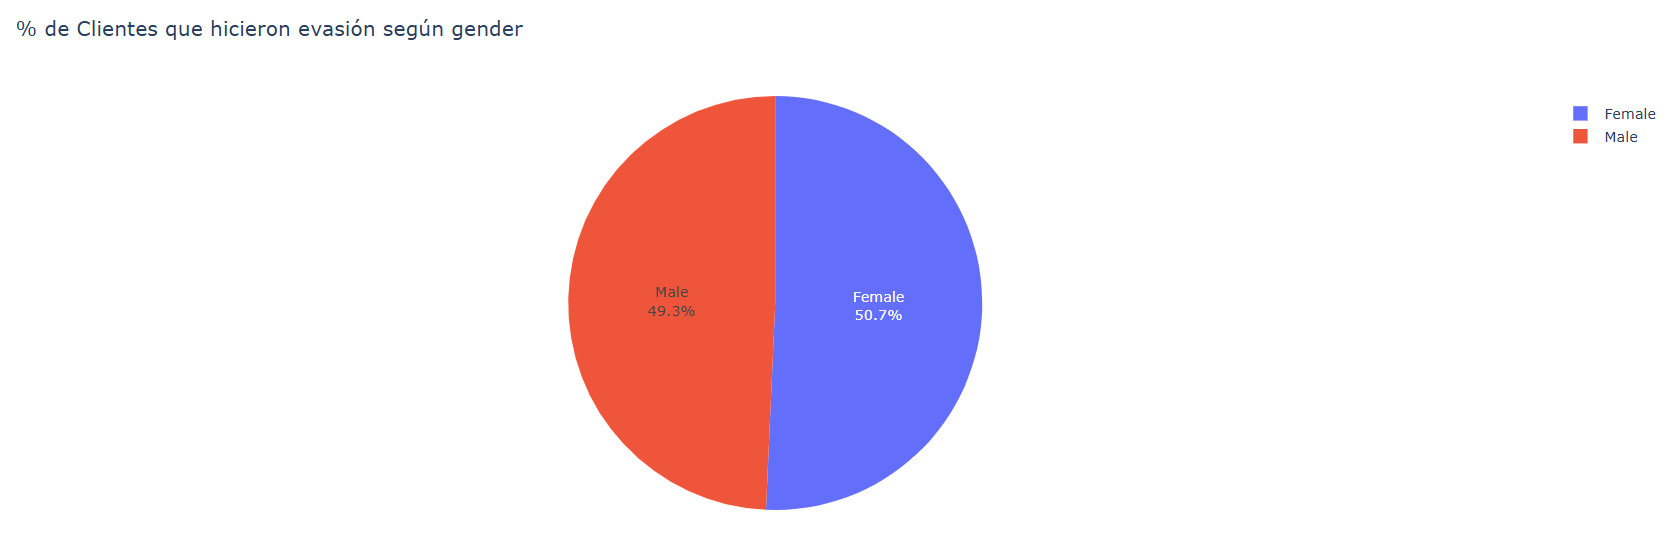

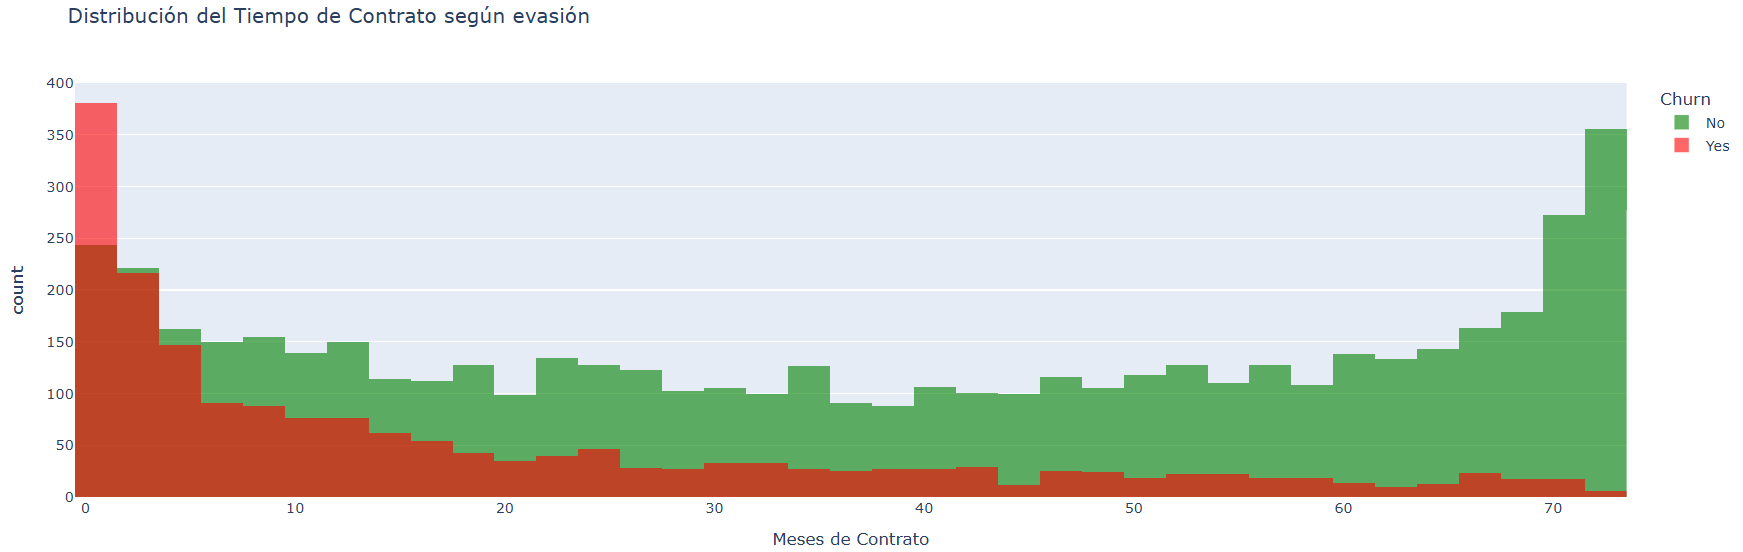

📌 3. Relación entre Churn y Variables Numéricas
En esta sección se analizaron variables continuas como tenure, Charges.Total y la variable derivada Cuentas_Diarias, con el objetivo de identificar diferencias significativas entre los clientes que permanecen y aquellos que cancelan el servicio.

🔍 Principales hallazgos:
⏳ Antigüedad del cliente (tenure):
Los clientes con menor tiempo de permanencia son los que más tienden a cancelar.
Esto indica que el riesgo de evasión es mayor durante los primeros meses de relación con la empresa, lo que resalta la importancia de trabajar estrategias de fidelización temprana.

💰 Gasto total acumulado (Charges.Total):
Quienes abandonan el servicio han gastado menos en términos absolutos, lo cual es coherente con su menor antigüedad.
Este hallazgo también puede interpretarse como una señal de desconexión temprana o insatisfacción inicial.

📉 Gasto diario estimado (Cuentas_Diarias):
Aunque la diferencia es más sutil, los clientes que cancelan presentan en promedio un menor gasto diario.
Esto podría reflejar que contratan planes más económicos o que perciben menos valor por el servicio recibido, lo cual influye en su decisión de no continuar.

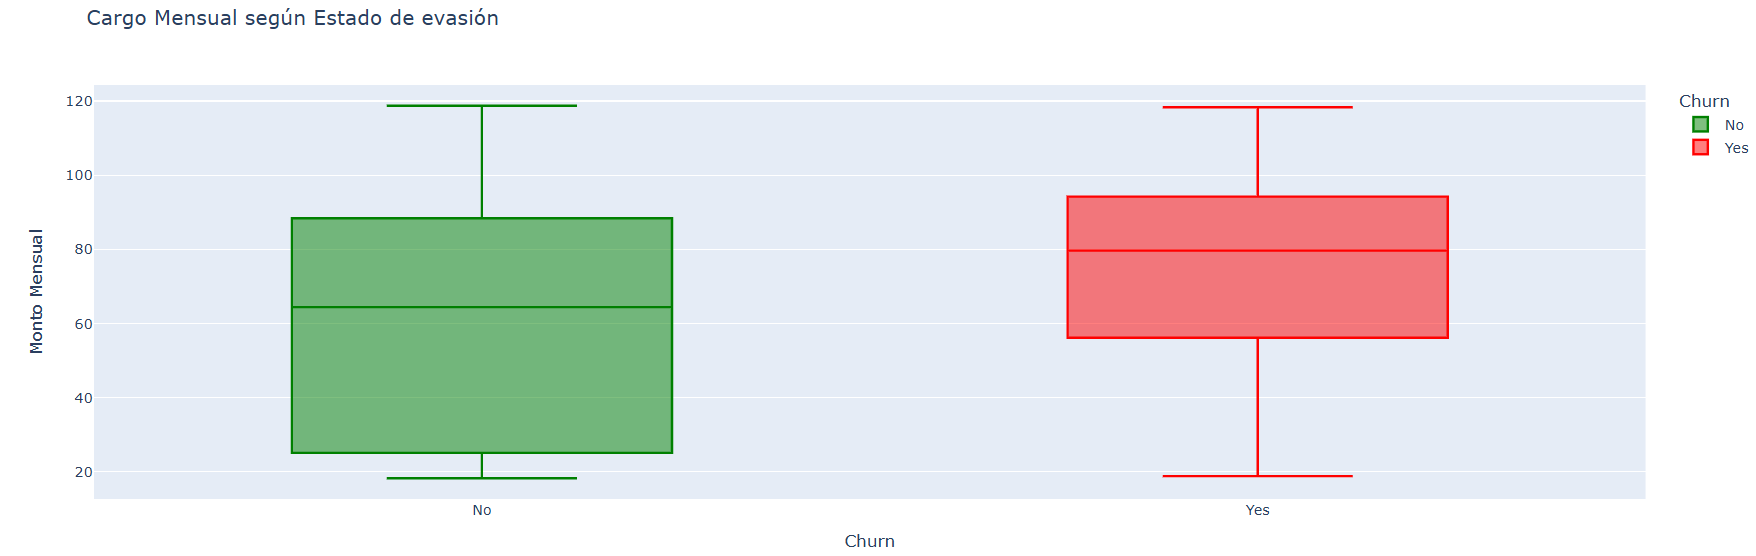


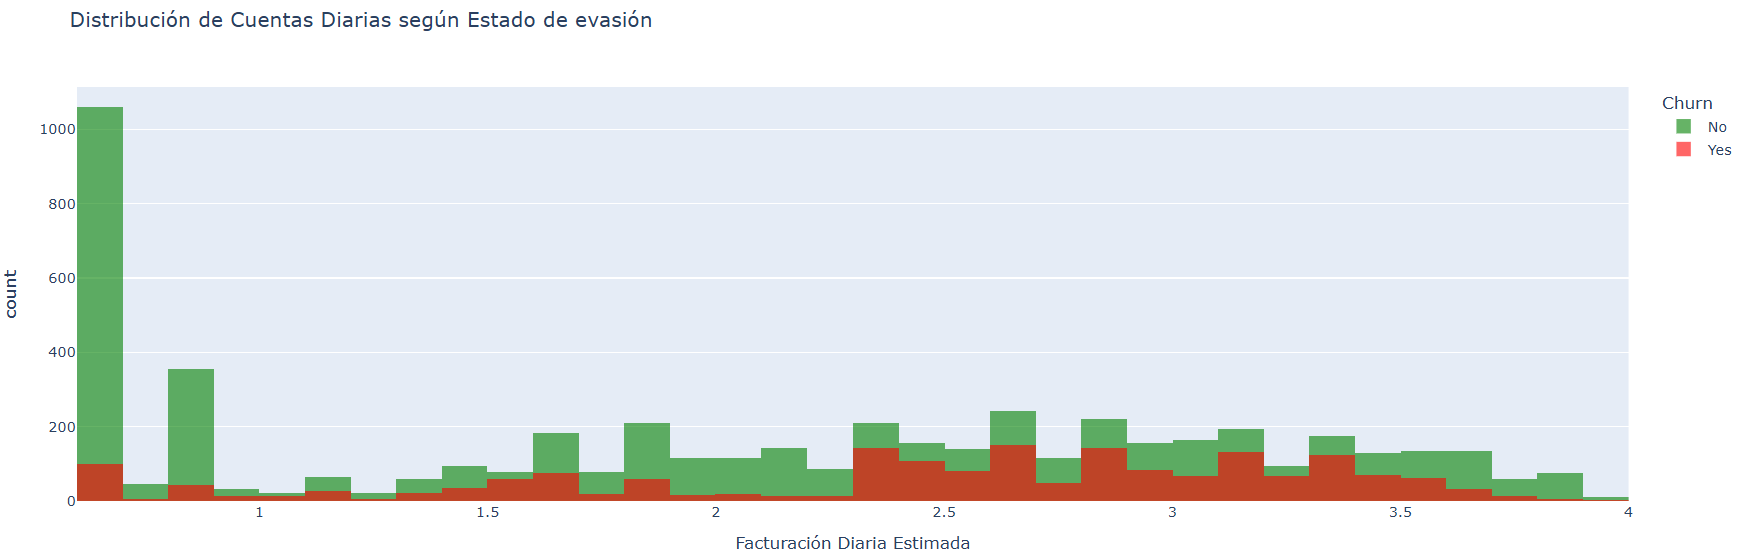


✅ Conclusiones
El análisis exploratorio de los datos de clientes de Telecom X permite comprender con mayor profundidad los factores que impulsan la evasión de clientes (churn) y ofrece insumos valiosos para desarrollar estrategias de retención más efectivas.

🔹 1. Alta tasa de evasión en segmentos específicos
Aproximadamente un 26% de los clientes cancela sus servicios, lo que representa un nivel de churn significativo que requiere atención prioritaria.
Este fenómeno se concentra especialmente entre clientes con contratos mensuales, mientras que los contratos de mayor duración (anuales o bianuales) presentan mejores tasas de retención.

🔹 2. Factores asociados al abandono
Se identificaron variables que elevan el riesgo de cancelación:

Los clientes que utilizan el método de pago “Electronic check” tienen una mayor tendencia al churn.

Quienes cuentan con servicio de internet por fibra óptica presentan tasas de evasión superiores frente a otros tipos de conexión.

La no contratación de servicios adicionales, como seguridad online y soporte técnico, se relaciona con un mayor abandono del servicio.

🔹 3. Variables financieras y de permanencia
Los clientes con menor antigüedad (tenure) son más propensos a cancelar, lo que sugiere una oportunidad para trabajar la fidelización desde las primeras etapas del ciclo de vida del cliente.

El gasto acumulado (Charges.Total) y el gasto diario estimado (Cuentas_Diarias) son más bajos en clientes que abandonan, lo cual puede reflejar una percepción limitada del valor recibido.

🎯 Recomendaciones
A partir de los hallazgos obtenidos, se proponen las siguientes acciones estratégicas:

Fidelización por tipo de contrato:
Desarrollar programas de incentivos para motivar a los clientes con contrato mensual a migrar hacia planes de mayor duración.

Optimización de métodos de pago:
Implementar campañas informativas y opciones más seguras o convenientes para los usuarios que emplean medios de pago de mayor riesgo, como el cheque electrónico.

Promoción de servicios adicionales:
Fomentar la contratación de servicios complementarios, como seguridad y soporte técnico, que parecen estar asociados a una mayor retención.

Estrategias para nuevos clientes:
Diseñar acciones de bienvenida y acompañamiento personalizado para los clientes con menor antigüedad, con el fin de reducir la evasión temprana.